## Esercizio 1: Consumo di alcol per paese

                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4
Media birra: 106.16062176165804
Media vino: 49.45077720207254
Media distillati: 80.99481865284974
Paese con indice massimo: country                            Andorra
beer_servings                          245
spirit_servings                        138
wine_servings                          312
total_litres_of_pure_alcohol          12.4
alcohol_index                   231.666667
Name: 3, dtype: object
 

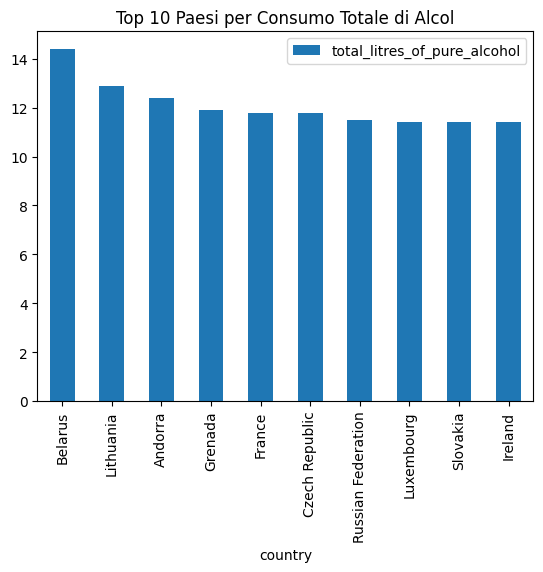

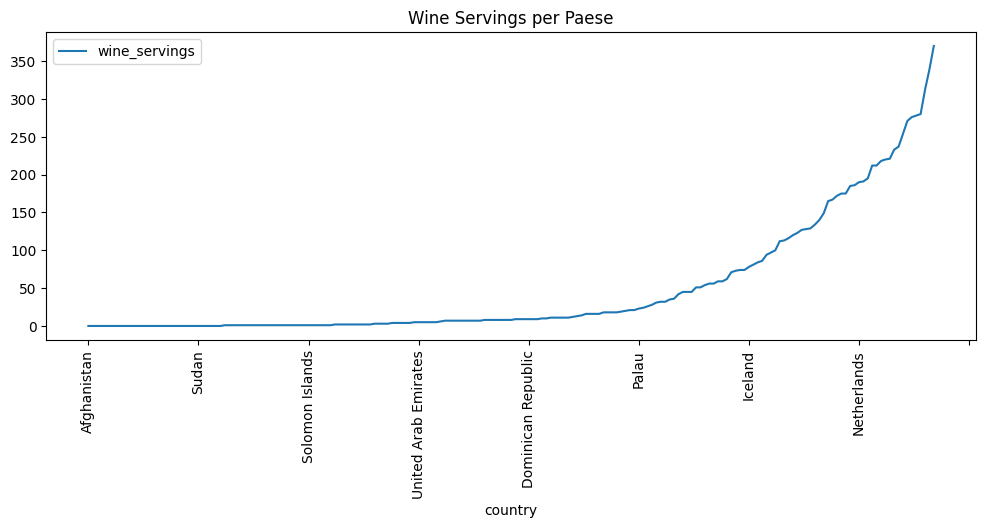

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

# Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol
print(df[['country', 'total_litres_of_pure_alcohol']].sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10))

# Calcola la media del consumo
print("Media birra:", df['beer_servings'].mean())
print("Media vino:", df['wine_servings'].mean())
print("Media distillati:", df['spirit_servings'].mean())

# Nuova colonna alcohol_index
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3

# Paese con valore massimo
print("Paese con indice massimo:", df.loc[df['alcohol_index'].idxmax()])

# Filtro paesi con più di 100 birre
df_filtered = df[df['beer_servings'] > 100]
print(df_filtered[['country', 'beer_servings']])

# Bar chart dei primi 10
df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10).plot(kind='bar', x='country', y='total_litres_of_pure_alcohol')
plt.title("Top 10 Paesi per Consumo Totale di Alcol")
plt.show()

# Line plot ordinato per wine_servings
df.sort_values(by='wine_servings').plot(x='country', y='wine_servings', kind='line', figsize=(12,4))
plt.xticks(rotation=90)
plt.title("Wine Servings per Paese")
plt.show()


## Esercizio 2: Analisi offerte di lavoro

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


       salary_year_avg
count     22003.000000
mean     123286.274072
std       48312.449482
min       15000.000000
25%       90000.000000
50%      115000.000000
75%      150000.000000
max      960000.000000


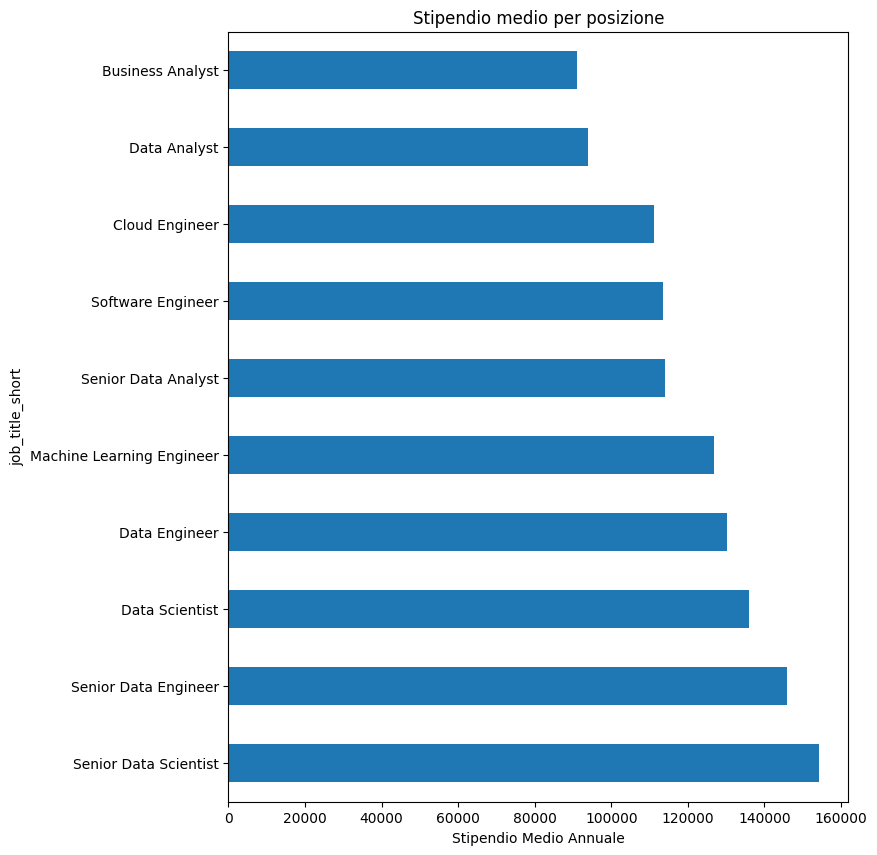

In [2]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Analisi base
print(df[['salary_year_avg', 'job_title_short']].describe())

# Stipendio medio per job title
mean_salary = df.groupby("job_title_short")["salary_year_avg"].mean().sort_values(ascending=False)
mean_salary.plot(kind='barh', figsize=(8, 10))
plt.xlabel("Stipendio Medio Annuale")
plt.title("Stipendio medio per posizione")
plt.show()


## Esercizio 3: Legge dei grandi numeri

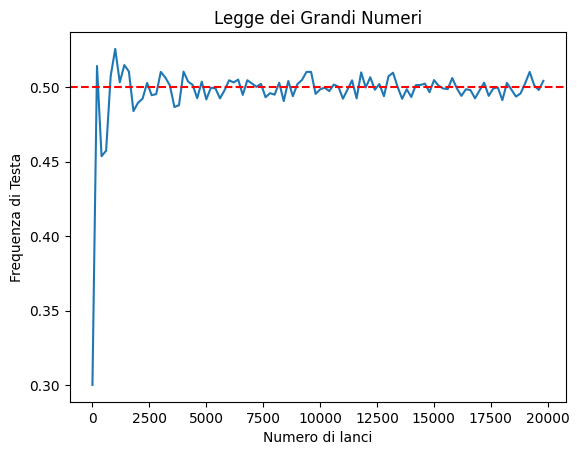

In [3]:
import random
import matplotlib.pyplot as plt

def lanci_moneta(n):
    return sum([random.choice([0, 1]) for _ in range(n)])

campioni = list(range(10, 20001, 200))
frequenze = [lanci_moneta(n)/n for n in campioni]

plt.plot(campioni, frequenze)
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza di Testa")
plt.title("Legge dei Grandi Numeri")
plt.show()
